## Penjelasan Dataset yang digunakan

In [1]:
## Berikan penjelasan terkait data apa yang digunakan diantaranya:
# 1. Kasus yang diambil
# 2. Penjelasan setiap kolomnya
# 3. Import library
# 4. Load data

### Pidato Ketua Dewan Gubernur Federal Reserve Jerome Powell 
##### 1. Analisis Sentimen ini dibuat untuk memahami dan mengukur sentimen (positif, negatif, atau netral) dari pernyataan yang dibuat oleh Ketua Federal Reserve, Jerome Powell, yang umumnya berdampak signifikan pada pasar keuangan global. Data yang digunakan adalah transkrip konferensi pers FOMC di mana Jerome Powell berbicara sebagai Ketua Federal Reserve. Idealnya, data ini dapat diperoleh dari kaggle.


##### 2. Penjelasan Setiap Kolom Data

Karena data sumber Anda adalah file TXT, kita akan melakukan Sentence Tokenization (pemecahan menjadi kalimat) sebagai langkah pra-pemrosesan data pertama.
Struktur DataFrame Anda setelah loading dan tokenization dari TXT akan memiliki minimal satu kolom utama, yang merupakan fokus analisis sentimen:
Nama Kolom nya Statement,	Tipe Data String dan Penjelasan Kolom utama yang berisi satu kalimat utuh dari pidato Jerome Powell. Ini adalah unit analisis dasar untuk sentimen.

##### 3. Import Library

In [7]:
# Untuk manipulasi dan analisis data
import pandas as pd
import numpy as np

# Untuk visualisasi (opsional, tapi disarankan)
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk Natural Language Processing (NLP) dan Sentimen
# NLTK adalah salah satu library dasar
import nltk
nltk.download('wordnet')
#untuk labeling
nltk.download('vader_lexicon')
import matplotlib.pyplot as plt

# nltk.download(['punkt', 'stopwords', 'vader_lexicon']) # Jalankan ini jika Anda belum memiliki paket-paket ini
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer # Algoritma sentimen populer
# Atau library yang lebih canggih seperti transformer dari Hugging Face
# from transformers import pipeline


[nltk_data] Downloading package wordnet to C:\Users\Dede Ahmad
[nltk_data]     Maolana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Dede Ahmad
[nltk_data]     Maolana\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


#### 4. Load Data

In [9]:
# Tentukan path file TXT Anda
file_path_txt = 'pidato_powel.txt'

# Load teks dari file
try:
    with open(file_path_txt, 'r', encoding='utf-8') as file:
        full_text = file.read()
    
    print("Teks berhasil dimuat!")

    # Langkah selanjutnya: Ubah teks menjadi DataFrame
    # 
    # Karena sentimen biasanya dianalisis per kalimat atau per paragraf, 
    # kita akan memecah teks menjadi kalimat-kalimat (sentence tokenization).
    
    # Memastikan library NLTK sudah diimpor dan paket 'punkt' sudah didownload
    import nltk
    # nltk.download('punkt') # uncomment/jalankan jika belum pernah didownload
    
    from nltk.tokenize import sent_tokenize
    
    # Tokenisasi teks menjadi daftar kalimat
    sentences = sent_tokenize(full_text)
    
    # Buat DataFrame dari daftar kalimat tersebut
    df = pd.DataFrame(sentences, columns=['Statement'])
    
except FileNotFoundError:
    print(f"Error: File TXT tidak ditemukan di {file_path_txt}. Pastikan path benar.")
    
except Exception as e:
    print(f"Terjadi kesalahan saat membaca file: {e}")

# Tampilkan 5 baris pertama (yang sekarang adalah kalimat-kalimat)
print("\n5 Kalimat Awal (diubah menjadi DataFrame):")
if 'df' in locals():
    print(df.head())
    
    # Tampilkan jumlah total kalimat/baris
    print(f"\nTotal Kalimat/Baris untuk Analisis: {len(df)}")

Teks berhasil dimuat!

5 Kalimat Awal (diubah menjadi DataFrame):
                                           Statement
0                         <NAME>CHAIR POWELL</NAME>.
1                                    Good afternoon.
2  At the Federal Reserve, we are strongly commit...
3  Since the beginning of the pandemic, we have t...
4  Today my colleagues on the Federal Open Market...

Total Kalimat/Baris untuk Analisis: 652


## Data Understanding

In [111]:
# 1. Jumlah baris data
# 2. Panjang rata-rata setiap baris
# 3. Cek data duplikasi
# 4. Cek data kosong
# 5. Distribusi data menggunakan bar chart, line chart atau word cloud, seperti kata yang sering muncul.

#### 1. Jumlah Baris Data

In [10]:
print(f"Jumlah baris dalam data: {len(df)}")

Jumlah baris dalam data: 652


#### 2. Panjang Rata - Rata Setiap Baris

In [11]:
# Hitung jumlah kata di setiap baris (kalimat)
df['Word_Count'] = df['Statement'].apply(lambda x: len(str(x).split()))

# Hitung panjang rata-rata
average_word_count = df['Word_Count'].mean()

print(f"Panjang rata-rata (jumlah kata) per baris: {average_word_count:.2f} kata")

# Tampilkan beberapa statistik deskriptif
print("\nStatistik Jumlah Kata:")
print(df['Word_Count'].describe())

Panjang rata-rata (jumlah kata) per baris: 15.90 kata

Statistik Jumlah Kata:
count    652.000000
mean      15.895706
std       15.139845
min        1.000000
25%        5.000000
50%       13.000000
75%       23.000000
max      204.000000
Name: Word_Count, dtype: float64


#### 3. Cek Data Duplikasi

In [12]:
# Cek jumlah duplikasi
duplicated_rows = df.duplicated(subset=['Statement']).sum()

print(f"Jumlah data duplikasi berdasarkan kolom 'Statement': {duplicated_rows}")

if duplicated_rows > 0:
    print("\nContoh data duplikasi:")
    # Tampilkan beberapa contoh yang duplikat
    duplicate_statements = df[df.duplicated(subset=['Statement'], keep=False)].sort_values(by='Statement')
    print(duplicate_statements.head(4))
    
    # Menghapus duplikasi (disarankan sebelum analisis)
    # df.drop_duplicates(subset=['Statement'], inplace=True)
    # print(f"\nJumlah baris setelah menghapus duplikasi: {len(df)}")

Jumlah data duplikasi berdasarkan kolom 'Statement': 82

Contoh data duplikasi:
                      Statement  Word_Count
0    <NAME>CHAIR POWELL</NAME>.           2
174  <NAME>CHAIR POWELL</NAME>.           2
200  <NAME>CHAIR POWELL</NAME>.           2
217  <NAME>CHAIR POWELL</NAME>.           2


#### 4. Cek Data Kosong

In [13]:
# Cek missing values per kolom
missing_values = df.isnull().sum()

print("\nJumlah data kosong (missing values) per kolom:")
print(missing_values)

if missing_values['Statement'] > 0:
    print(f"\nPERHATIAN: Ditemukan {missing_values['Statement']} baris kosong pada kolom 'Statement'. Perlu dihapus/ditangani.")
    # Menghapus baris dengan nilai kosong
    # df.dropna(subset=['Statement'], inplace=True)


Jumlah data kosong (missing values) per kolom:
Statement     0
Word_Count    0
dtype: int64


#### 5. Distribusi data menggunakan bar chart, line chart atau word cloud, seperti kata yang sering muncul.

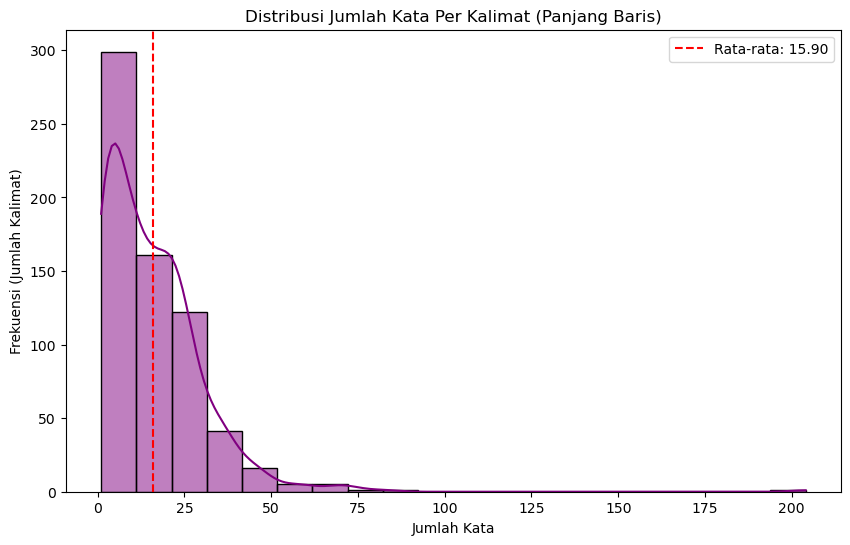

In [14]:


# Asumsi: Kolom 'Word_Count' sudah ada (dibuat di langkah Data Understanding #2)
# Jika belum, pastikan Anda menjalankannya:
# df['Word_Count'] = df['Statement'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 6))
# Menggunakan distplot atau histplot untuk melihat distribusi frekuensi
sns.histplot(df['Word_Count'], bins=20, kde=True, color='purple')
plt.title('Distribusi Jumlah Kata Per Kalimat (Panjang Baris)')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi (Jumlah Kalimat)')
plt.axvline(df['Word_Count'].mean(), color='red', linestyle='--', label=f"Rata-rata: {df['Word_Count'].mean():.2f}")
plt.legend()
plt.show()

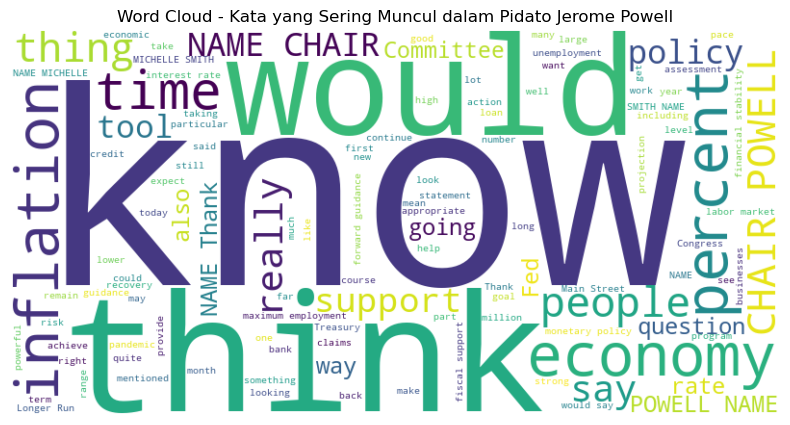

In [15]:
from wordcloud import WordCloud

# Gabungkan semua teks menjadi satu string
all_text = ' '.join(df['Statement'].astype(str))

# --- Pre-processing Awal untuk Word Cloud ---
# Hapus Stopwords (kata umum seperti 'dan', 'yang', 'The', 'a', dll.)
from nltk.corpus import stopwords
# Tambahkan beberapa kata yang mungkin sering muncul di pidato Fed
stop_words = set(stopwords.words('english'))
stop_words.update(['the', 'to', 'of', 'and', 'in', 'is', 'we', 'that', 'it', 'will', 'a', 'our', 'for', 'have', 'as', 'are', 'be', 'i', 'this', 'us']) # Tambahan kata umum

# Generate Word Cloud
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    stopwords=stop_words, 
    min_font_size=10
).generate(all_text)

# Tampilkan visualisasi
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Kata yang Sering Muncul dalam Pidato Jerome Powell")
plt.show()

## Data Text Processing

In [ ]:
# 1. Tokenisasi
# 2. Lemmatization
# 3. Stemming
# 4. Stopword removal (Tanda baca, angka dan kata)
# 5. Text Normalisasi
# 6. Matrix correlation (opsional)
# 7. Labeling data (Lexicon, Bert, atau polarity)
# 8. Text Vektorisasi
# 9. Data splitting dengan skala (0.8, 02)(0.9, 0.1)(0.75, 0.25)(0.85, 0.15) pilih salah satu dari beberapa skala yang ditentukan

#### 1. Tokenisasi 

In [16]:
from nltk.tokenize import word_tokenize

# Tokenisasi setiap kalimat di kolom 'Statement'
df['Tokens'] = df['Statement'].apply(lambda x: word_tokenize(x.lower()))

print("Contoh hasil Tokenisasi:")
print(df['Tokens'].head(1))

Contoh hasil Tokenisasi:
0    [<, name, >, chair, powell, <, /name, >, .]
Name: Tokens, dtype: object


#### 2. Stopword Removal (Tanda Baca, Angka, dan Kata)

In [17]:
from nltk.corpus import stopwords
import string

# 1. Definisikan Stopwords dan Punctuation
stop_words = set(stopwords.words('english'))
# Tambahkan Punctuation (tanda baca)
punctuation = string.punctuation

# 2. Definisikan Fungsi Pembersihan
def clean_tokens(tokens):
    cleaned_tokens = []
    for token in tokens:
        # Hapus angka
        if token.isdigit():
            continue
        # Hapus Punctuation
        if token in punctuation:
            continue
        # Hapus Stopwords
        if token in stop_words:
            continue
        # Hapus token yang hanya berisi satu karakter (misalnya sisa dari 's)
        if len(token) <= 1:
            continue
        
        cleaned_tokens.append(token)
    return cleaned_tokens

# 3. Terapkan Fungsi
df['Cleaned_Tokens'] = df['Tokens'].apply(clean_tokens)

print("\nContoh hasil Stopword Removal & Pembersihan:")
print(df['Cleaned_Tokens'].head(1))


Contoh hasil Stopword Removal & Pembersihan:
0    [name, chair, powell, /name]
Name: Cleaned_Tokens, dtype: object


#### 3. Lemmatization dan Stemming

In [18]:
from nltk.stem import WordNetLemmatizer
# nltk.download('wordnet') 

lemmatizer = WordNetLemmatizer()

# Definisikan Fungsi Lemmatization
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

# Terapkan Fungsi
df['Lemmatized_Tokens'] = df['Cleaned_Tokens'].apply(lemmatize_tokens)

# Gabungkan token yang telah dilemmatisasi menjadi teks kembali (diperlukan untuk Vektorisasi)
df['Cleaned_Text'] = df['Lemmatized_Tokens'].apply(lambda x: ' '.join(x))

print("\nContoh hasil Lemmatization (Tokens):")
print(df['Lemmatized_Tokens'].head(1))
print("\nContoh hasil Lemmatization (Text untuk Vektorisasi):")
print(df['Cleaned_Text'].head(1))


Contoh hasil Lemmatization (Tokens):
0    [name, chair, powell, /name]
Name: Lemmatized_Tokens, dtype: object

Contoh hasil Lemmatization (Text untuk Vektorisasi):
0    name chair powell /name
Name: Cleaned_Text, dtype: object


#### 4. Text Normalisasi
Text Normalisasi sudah tercakup dalam langkah-langkah sebelumnya, sperti 
 1. Case Folding: Mengubah semua teks menjadi huruf kecil (.lower()) pada langkah tokenisasi.
 2. Pembersihan: Menghapus angka, tanda baca, dan stopwords.
 3. Lematization: Menyeragamkan bentuk kata.

#### 5. Labeling Data 

In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# nltk.download('vader_lexicon') # Pastikan sudah diunduh

sid = SentimentIntensityAnalyzer()

# Definisikan Fungsi untuk Mendapatkan Sentimen VADER
def get_vader_sentiment(text):
    scores = sid.polarity_scores(text)
    # Gunakan skor 'compound' (komposit) untuk menentukan sentimen
    if scores['compound'] >= 0.05:
        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Terapkan Labeling pada teks bersih
df['Sentiment'] = df['Cleaned_Text'].apply(get_vader_sentiment)
df['Polarity_Score'] = df['Statement'].apply(lambda x: sid.polarity_scores(x)['compound']) # Menggunakan teks asli untuk skor yang lebih baik

print("\nContoh hasil Labeling Sentimen:")
print(df[['Statement', 'Sentiment', 'Polarity_Score']].head())


Contoh hasil Labeling Sentimen:
                                           Statement Sentiment  Polarity_Score
0                         <NAME>CHAIR POWELL</NAME>.   Neutral          0.0000
1                                    Good afternoon.  Positive          0.4404
2  At the Federal Reserve, we are strongly commit...  Positive          0.4939
3  Since the beginning of the pandemic, we have t...  Positive          0.7003
4  Today my colleagues on the Federal Open Market...  Positive          0.5859


#### 6. Text Vektorisasi

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TF-IDF Vectorizer
# Teks bersih digunakan sebagai fitur
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Batasi jumlah fitur (kata)

# Fit dan Transform data teks
X = tfidf_vectorizer.fit_transform(df['Cleaned_Text']).toarray()
y = df['Sentiment'] # Label sentimen yang sudah dibuat

print("\nBentuk Matriks Fitur (X) setelah Vektorisasi:")
print(X.shape)


Bentuk Matriks Fitur (X) setelah Vektorisasi:
(652, 1338)


#### 7. Data Splitting

In [21]:
from sklearn.model_selection import train_test_split

# Split data dengan skala 80% (train) dan 20% (test)
X_train, X_test, y_train, y_test = train_test_split(
    X,              # Matriks fitur (hasil TF-IDF)
    y,              # Label (sentimen)
    test_size=0.20, # Skala 20% untuk data uji
    random_state=42, # Untuk memastikan hasil yang sama setiap kali dijalankan
    stratify=y       # Penting untuk klasifikasi: memastikan distribusi label di train/test set sama
)

print(f"\nUkuran Data Training (X_train, y_train): {X_train.shape}, {y_train.shape}")
print(f"Ukuran Data Testing (X_test, y_test): {X_test.shape}, {y_test.shape}")


Ukuran Data Training (X_train, y_train): (521, 1338), (521,)
Ukuran Data Testing (X_test, y_test): (131, 1338), (131,)


#### 8. Matrix Correlation 

In [22]:
# Korelasi antara Polarity Score dan Word Count
correlation = df['Polarity_Score'].corr(df['Word_Count'])
print(f"\nKorelasi antara Polarity Score dan Jumlah Kata: {correlation:.2f}")


Korelasi antara Polarity Score dan Jumlah Kata: 0.16


## Data Modeling

In [3]:
# Berikan Penjelasan tentang model yang dipilih

#### Penjelasan Model

Model yang digunakan adalah Support Vector Machine (SVM), dimana algoritma ini merupakan pembelajaran terawasi (supervised learning) yang sangat efektif untuk tugas klasifikasi dan regresi, terutama dalam ruang fitur berdimensi tinggi, seperti data teks yang divetorisasi menggunakan TF-IDF.

##### 1. Konsep Dasar: Hyperplane dan Margin 
Tujuan utama SVM adalah menemukan hyperplane (bidang pemisah) terbaik yang membagi kelas-kelas data (Positif, Negatif, Netral) dalam ruang $N$-dimensi.Hyperplane: Batas keputusan yang memisahkan titik data dari kelas yang berbeda.Margin: Jarak antara hyperplane dan titik data terdekat dari setiap kelas. Titik data terdekat ini disebut Support Vectors.Optimal Hyperplane: SVM mencari hyperplane yang memiliki margin terbesar. Margin yang besar memberikan batas keputusan yang lebih kokoh dan membantu model memiliki kemampuan generalisasi yang lebih baik ke data baru.

##### 2. Penerapan SVM pada Data Teks (TF-IDF)

Dalam proyek Anda, data input ke SVM adalah matriks numerik yang dihasilkan dari TF-IDF Vectorization 
($X_{\text{train}}$ dan $X_{\text{test}}$).Fitur: Setiap dimensi (kolom) dalam matriks TF-IDF merepresentasikan bobot pentingnya suatu kata dalam kalimat (fitur). Karena TF-IDF biasanya menghasilkan ribuan fitur (kata unik), data Anda berada dalam ruang berdimensi tinggi.Proses: SVM menggunakan bobot-bobot TF-IDF ini untuk menentukan bagaimana setiap kalimat (data point) ditempatkan di ruang fitur. Kemudian, ia menemukan hyperplane optimal yang memisahkan kalimat-kalimat yang memiliki sentimen berbeda (misalnya, memisahkan kalimat "Netral" dari "Positif").

##### 3. Kernel Trick (Penanganan Data Non-Linier)

Salah satu kekuatan terbesar SVM adalah kemampuannya menangani data yang tidak dapat dipisahkan secara linier (data yang tidak bisa dipisah hanya dengan garis lurus atau bidang datar).

Fungsi Kernel: Melalui teknik yang disebut Kernel Trick, SVM secara implisit memetakan data Anda ke ruang berdimensi lebih tinggi. Di ruang baru ini, data non-linier menjadi dapat dipisahkan secara linier.

Pilihan Kernel: Untuk data TF-IDF (yang cenderung sudah cukup linier), kernel Linear seringkali merupakan pilihan yang cepat dan efektif. Namun, kernel seperti Radial Basis Function (RBF) dapat digunakan jika batas pemisahan sentimen ternyata kompleks.

##### 4. SVM

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Asumsi: X_train, X_test, y_train, y_test sudah terdefinisi dari Data Splitting.

# Inisialisasi model Support Vector Classifier (SVC)
svm_model = SVC(kernel='linear', random_state=42)

# Melatih model dengan data training
svm_model.fit(X_train, y_train)

# Membuat prediksi pada data testing <-- BARIS KRUSIAL INI HARUS DIJALANKAN
y_pred_svm = svm_model.predict(X_test)

print("Prediksi model SVM berhasil dibuat!")

Prediksi model SVM berhasil dibuat!


In [23]:
import gensim
from gensim import corpora

# Asumsi: df['Lemmatized_Tokens'] sudah tersedia.

# 1. Membuat Dictionary (Kamus)
# Dictionary memetakan setiap kata unik menjadi ID numerik.
dictionary = corpora.Dictionary(df['Lemmatized_Tokens'])

# Filter out tokens yang terlalu jarang atau terlalu sering (opsional tapi disarankan)
# Misalnya, hilangkan kata yang muncul kurang dari 5 dokumen atau lebih dari 50% dokumen
dictionary.filter_extremes(no_below=5, no_above=0.5)

# 2. Membuat Corpus (Document-Term Matrix - DTM)
# Corpus mengubah tokens menjadi vektor Bag-of-Words (BoW)
# Setiap dokumen (kalimat) diwakili sebagai daftar pasangan (ID, Frekuensi)
corpus = [dictionary.doc2bow(tokens) for tokens in df['Lemmatized_Tokens']]

print(f"Jumlah kata unik di kamus (setelah filter): {len(dictionary)}")
print(f"Contoh Corpus (Kalimat 1, format ID:Frekuensi): {corpus[0][:5]}")

Jumlah kata unik di kamus (setelah filter): 241
Contoh Corpus (Kalimat 1, format ID:Frekuensi): [(0, 1), (1, 1), (2, 1), (3, 1)]


In [24]:
# Tentukan jumlah topik yang ingin Anda temukan
NUM_TOPICS = 5 

# Latih Model LDA
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,  # Kamus kata ke ID
    num_topics=NUM_TOPICS,
    random_state=100,
    update_every=1,
    chunksize=100,
    passes=10,
    alpha='auto',
    per_word_topics=True
)

print("\nModel LDA berhasil dilatih!")


Model LDA berhasil dilatih!


In [25]:
from pprint import pprint

# Tampilkan topik dan kata-kata kunci (top 10 kata per topik)
pprint(lda_model.print_topics())

[(0,
  '0.106*"know" + 0.068*"would" + 0.057*"think" + 0.041*"people" + '
  '0.038*"thing" + 0.032*"fed" + 0.028*"like" + 0.028*"lot" + '
  '0.027*"commercial" + 0.027*"really"'),
 (1,
  '0.067*"say" + 0.048*"thank" + 0.042*"time" + 0.040*"way" + 0.037*"much" + '
  '0.036*"going" + 0.033*"guidance" + 0.030*"policy" + 0.027*"well" + '
  '0.027*"tool"'),
 (2,
  '0.117*"inflation" + 0.078*"percent" + 0.051*"rate" + 0.037*"lower" + '
  '0.035*"average" + 0.031*"get" + 0.030*"back" + 0.026*"interest" + '
  '0.025*"want" + 0.025*"labor"'),
 (3,
  '0.064*"economy" + 0.052*"support" + 0.046*"mean" + 0.037*"also" + '
  '0.029*"large" + 0.028*"could" + 0.023*"important" + 0.022*"policy" + '
  '0.020*"see" + 0.020*"long"'),
 (4,
  '0.151*"/name" + 0.151*"name" + 0.080*"powell" + 0.067*"chair" + '
  '0.058*"question" + 0.054*"real" + 0.050*"michelle" + 0.048*"smith" + '
  '0.036*"thanks" + 0.031*"mentioned"')]


In [26]:
import pandas as pd

# Dapatkan topik dan kata-kata kunci
topic_data = lda_model.print_topics(num_words=10)

# Buat list untuk menampung data tabel
table_data = []

for topic_id, topic_info in topic_data:
    # Ekstraksi kata-kata kunci (hanya string kata, tanpa bobot)
    words = [word.split('*')[1].strip().replace('"', '') for word in topic_info.split(' + ')]
    table_data.append([topic_id] + words)

# Buat DataFrame
columns = ['Topic ID'] + [f'Kata Kunci {i+1}' for i in range(10)]
df_topics = pd.DataFrame(table_data, columns=columns)

print("--- Tabel Kata Kunci Topik ---")
print(df_topics)

--- Tabel Kata Kunci Topik ---
   Topic ID Kata Kunci 1 Kata Kunci 2 Kata Kunci 3 Kata Kunci 4 Kata Kunci 5  \
0         0         know        would        think       people        thing   
1         1          say        thank         time          way         much   
2         2    inflation      percent         rate        lower      average   
3         3      economy      support         mean         also        large   
4         4        /name         name       powell        chair     question   

  Kata Kunci 6 Kata Kunci 7 Kata Kunci 8 Kata Kunci 9 Kata Kunci 10  
0          fed         like          lot   commercial        really  
1        going     guidance       policy         well          tool  
2          get         back     interest         want         labor  
3        could    important       policy          see          long  
4         real     michelle        smith       thanks     mentioned  


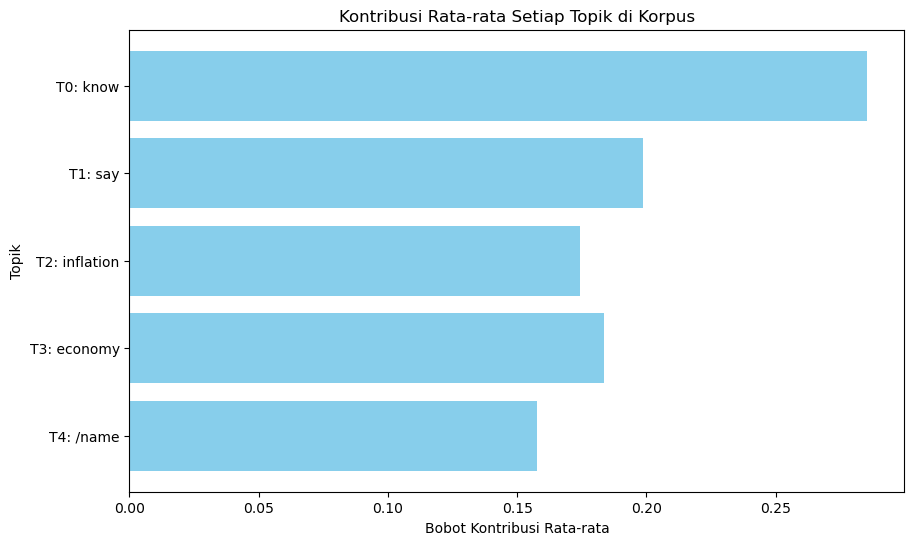

In [27]:
import matplotlib.pyplot as plt

# 1. Dapatkan distribusi bobot topik secara keseluruhan
# Hitung bobot rata-rata topik di seluruh dokumen
topic_weights = [sum(weight for _, weight in doc_topics) / len(doc_topics) 
                 for doc_topics in [lda_model.get_document_topics(doc) for doc in corpus] 
                 if doc_topics]

# Rata-rata bobot untuk setiap topik
topic_distribution = {}
for doc_topics in [lda_model.get_document_topics(doc) for doc in corpus]:
    for topic_id, weight in doc_topics:
        topic_distribution[topic_id] = topic_distribution.get(topic_id, 0) + weight

# Konversi ke rata-rata
total_docs = len(corpus)
avg_topic_distribution = {topic_id: weight / total_docs for topic_id, weight in topic_distribution.items()}

# Siapkan data untuk plotting
topic_labels = [f"T{id}: {df_topics.iloc[id]['Kata Kunci 1']}" for id in avg_topic_distribution.keys()]
weights = list(avg_topic_distribution.values())

plt.figure(figsize=(10, 6))
plt.barh(topic_labels, weights, color='skyblue')
plt.title('Kontribusi Rata-rata Setiap Topik di Korpus')
plt.xlabel('Bobot Kontribusi Rata-rata')
plt.ylabel('Topik')
plt.gca().invert_yaxis() # Topik dengan bobot tertinggi di atas
plt.show()

In [29]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Asumsi: X (Matriks TF-IDF) dan y (Label Sentimen) sudah ada.

# 1. Normalisasi Data (Penting sebelum PCA/t-SNE)
scaler = StandardScaler(with_mean=False) # Gunakan with_mean=False untuk data sparse
X_scaled = scaler.fit_transform(X)

# 2. Reduksi Dimensi Awal dengan PCA (Opsional, tapi Disarankan)
# Kurangi dimensi ke 50 komponen
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# 3. Penerapan t-SNE
# Reduksi X_pca dari 50 dimensi ke 2 dimensi
tsne = TSNE(
    n_components=2, 
    perplexity=30,  # Parameter sensitif, 5 hingga 50 adalah umum
    max_iter=500,     # Jumlah iterasi
    learning_rate='auto',
    init='pca', 
    random_state=42
)
X_tsne = tsne.fit_transform(X_pca)

print(f"Dimensi data TF-IDF asli: {X.shape}")
print(f"Dimensi data setelah t-SNE: {X_tsne.shape}")

Dimensi data TF-IDF asli: (652, 1338)
Dimensi data setelah t-SNE: (652, 2)


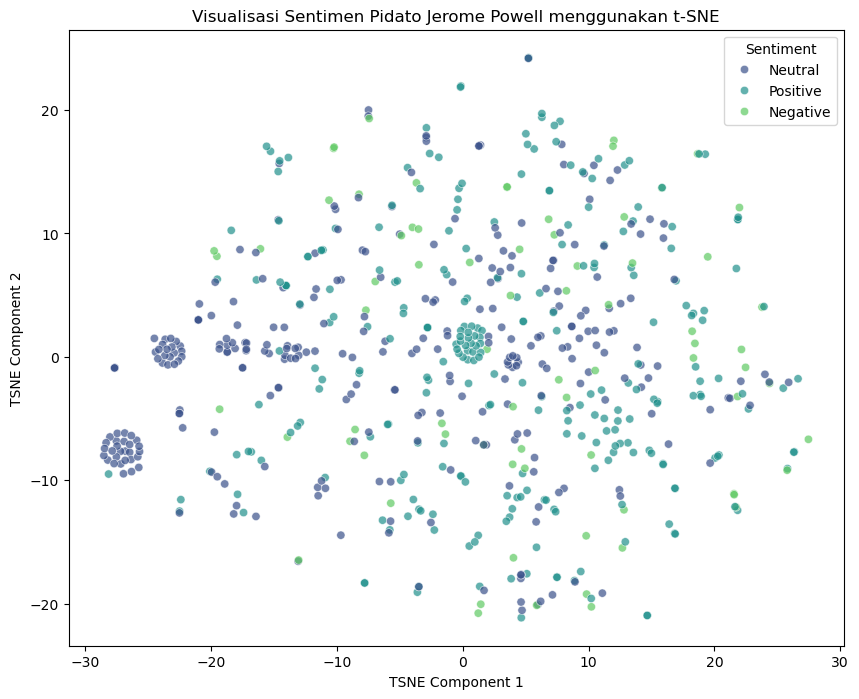

In [30]:
# Gabungkan hasil t-SNE dan label sentimen ke dalam DataFrame untuk visualisasi
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE Component 1', 'TSNE Component 2'])
tsne_df['Sentiment'] = y.reset_index(drop=True) # Pastikan indeks y cocok dengan X

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='TSNE Component 1', 
    y='TSNE Component 2', 
    hue='Sentiment', 
    palette='viridis', 
    data=tsne_df, 
    legend='full', 
    alpha=0.7
)
plt.title('Visualisasi Sentimen Pidato Jerome Powell menggunakan t-SNE')
plt.show()